## Introducción sobre Bellabeat

Bellabeat tiene diferentes productos enfocados en la salud para mujeres. El siguiente análisis se centrará en la app de Bellabeat, así como en cómo mejorar el marketing para conocer más a los clientes actuales y potenciales.
## Preguntas
* ¿Cómo usan este dispositivo los usuarios de datos de seguimiento de actividad física?

* ¿Cómo nos ayuda esta información a mejorar la estrategia de marketing de Bellabeat?

* ¿Qué mejoras puede tener la app Bellabeat?

## Preparando los datos

### Lectura de los archivos que se utilizarán
Para este proyecto, los datos utilizados serán [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)

In [3]:
daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
heartrate_seconds <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log_info <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

### Configuración del entorno para la limpieza de datos

In [4]:
install.packages("tidyverse", repos = "https://ftp.cixug.es/CRAN/")
install.packages("here", repos = "https://ftp.cixug.es/CRAN/")
install.packages("skimr", repos = "https://ftp.cixug.es/CRAN/")
install.packages("janitor", repos = "https://ftp.cixug.es/CRAN/")
install.packages("dplyr", repos = "https://ftp.cixug.es/CRAN/")
install.packages("lubridate", repos = "https://ftp.cixug.es/CRAN/")
install.packages("rmarkdown", repos = "https://ftp.cixug.es/CRAN/")
install.packages("ggplot2", repos = "https://ftp.cixug.es/CRAN/")

library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(dplyr)
library(lubridate)
library(ggplot2)
library(rmarkdown)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://ftp.cixug.es/CRAN/src/contrib:
  cannot open URL 'https://ftp.cixug.es/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://ftp.cixug.es/CRAN/src/contrib:
  cannot open URL 'https://ftp.cixug.es/CRAN/src/contrib/PACKAGES'”
Warning message:
“package ‘here’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
I

### Mirando los datos
Primero, para conocer nuestros datos, comenzaré a usar la función glimpse. Nos dirá el nombre de las columnas y su tipo de dato.

In [5]:
glimpse(daily_activity)
glimpse(heartrate_seconds)
glimpse(sleep_day)
glimpse(weight_log_info)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

A continuación, usaré el la función head para ver el inicio de cada tabla.

In [6]:
head(daily_activity)
head(heartrate_seconds)
head(sleep_day)
head(weight_log_info)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


### Limpiar y renombrar nombres de columnas

In [7]:
daily_activity <- clean_names(daily_activity)
heartrate_seconds <- clean_names(heartrate_seconds)
sleep_day <- clean_names(sleep_day)
weight_log_info <- clean_names(weight_log_info)

sleep_day <- rename(sleep_day, date = sleep_day)

### Ordenando los datos

In [8]:
daily_activity <- daily_activity %>% arrange(id)
heartrate_seconds <- heartrate_seconds %>% arrange(id)
sleep_day <- sleep_day %>% arrange(id)
weight_log_info <- weight_log_info %>% arrange(id)

### Convirtiendo una variable
Me di cuenta de que la variable fecha es un tipo de cadena en cada tabla. Voy a cambiarlo a tipo fecha

In [9]:
daily_activity$activity_date <- mdy(daily_activity$activity_date)
heartrate_seconds$time <- mdy_hms(heartrate_seconds$time)
sleep_day$date <- mdy_hms(sleep_day$date)
weight_log_info$date <- mdy_hms(weight_log_info$date)

### Fechas
A continuación, voy a explorar el intervalo de fechas

In [10]:
daily_activity %>% group_by(id) %>%  
  summarize(start_date = min(activity_date), end_date = max(activity_date))
heartrate_seconds %>% group_by(id) %>% 
  summarize(start_date = min(time), end_date = max(time))
sleep_day %>%  group_by(id) %>% 
  summarize(start_date = min(date), end_date = max(date))
weight_log_info %>% group_by(id) %>% 
  summarize(start_date = min(date), end_date = max(date))

id,start_date,end_date
<dbl>,<date>,<date>
1503960366,2016-04-12,2016-05-12
1624580081,2016-04-12,2016-05-12
1644430081,2016-04-12,2016-05-11
1844505072,2016-04-12,2016-05-12
1927972279,2016-04-12,2016-05-12
2022484408,2016-04-12,2016-05-12
2026352035,2016-04-12,2016-05-12
2320127002,2016-04-12,2016-05-12
2347167796,2016-04-12,2016-04-29


id,start_date,end_date
<dbl>,<dttm>,<dttm>
2022484408,2016-04-12 07:21:00,2016-05-12 15:48:05
2026352035,2016-04-17 05:30:20,2016-05-09 19:49:45
2347167796,2016-04-12 07:19:00,2016-04-29 06:56:50
4020332650,2016-04-12 00:00:00,2016-05-12 12:20:57
4388161847,2016-04-13 00:00:00,2016-05-12 15:13:30
4558609924,2016-04-12 06:44:30,2016-05-12 16:20:00
5553957443,2016-04-12 00:00:00,2016-05-12 09:10:55
5577150313,2016-04-12 00:00:05,2016-05-11 12:04:20
6117666160,2016-04-15 11:27:00,2016-05-09 12:54:40


id,start_date,end_date
<dbl>,<dttm>,<dttm>
1503960366,2016-04-12,2016-05-11
1644430081,2016-04-29,2016-05-08
1844505072,2016-04-15,2016-05-01
1927972279,2016-04-12,2016-04-28
2026352035,2016-04-12,2016-05-12
2320127002,2016-04-23,2016-04-23
2347167796,2016-04-13,2016-04-29
3977333714,2016-04-12,2016-05-10
4020332650,2016-04-12,2016-05-10


id,start_date,end_date
<dbl>,<dttm>,<dttm>
1503960366,2016-05-02 23:59:59,2016-05-03 23:59:59
1927972279,2016-04-13 01:08:52,2016-04-13 01:08:52
2873212765,2016-04-21 23:59:59,2016-05-12 23:59:59
4319703577,2016-04-17 23:59:59,2016-05-04 23:59:59
4558609924,2016-04-18 23:59:59,2016-05-09 23:59:59
5577150313,2016-04-17 09:17:55,2016-04-17 09:17:55
6962181067,2016-04-12 23:59:59,2016-05-12 23:59:59
8877689391,2016-04-12 06:47:11,2016-05-12 06:42:53


Tenemos datos de aproximadamente un mes.

## Análisis de los datos
* ¿Cuál es la relación entre pasos totales y minutos sedentarios?

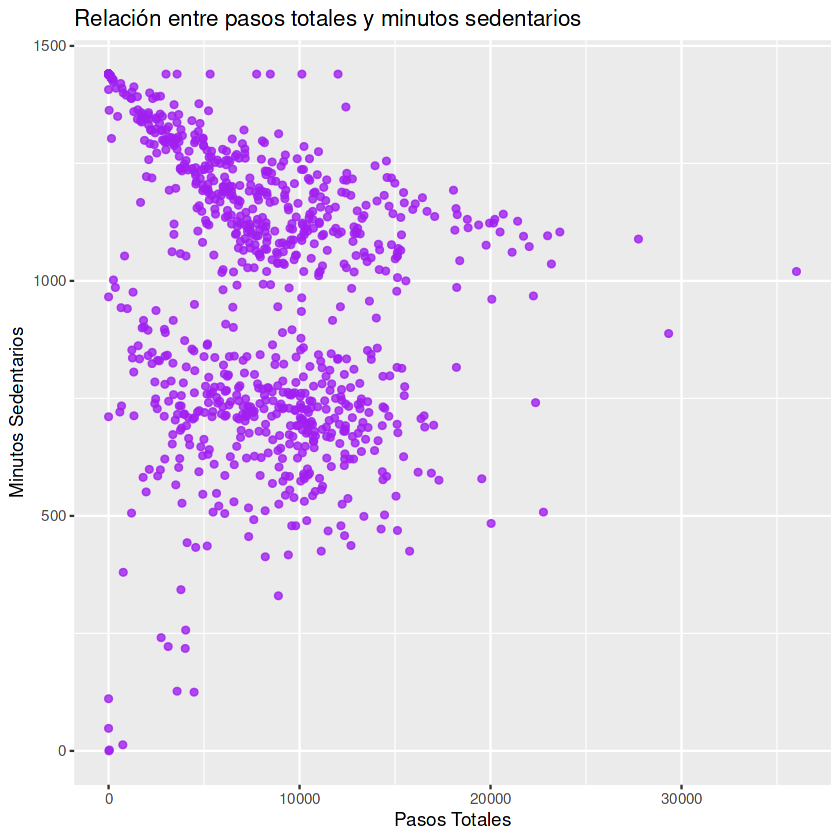

In [11]:
ggplot(data=daily_activity, aes(x=total_steps, y=sedentary_minutes)) + geom_point(alpha=0.8, color="purple") + 
  labs(title= "Relación entre pasos totales y minutos sedentarios",
       x = "Pasos Totales", y = "Minutos Sedentarios")

El gráfico muestra que no hay correlación entre estas variables.

* Relación entre el total de minutos dormidos y el tiempo total en la cama

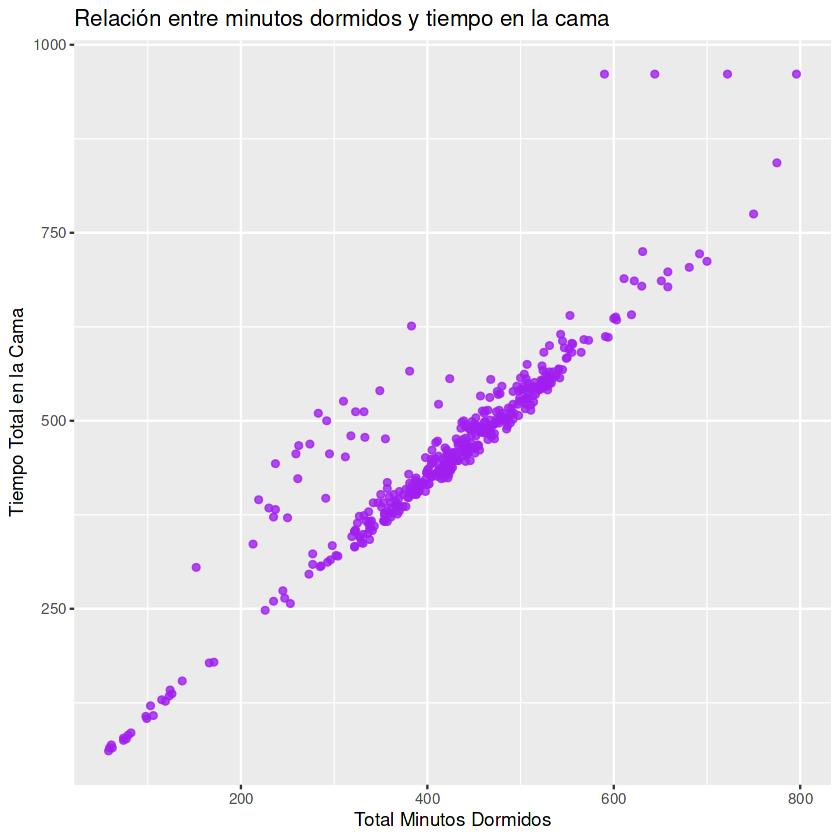

In [12]:
ggplot(data=sleep_day, aes(x = total_minutes_asleep, y=total_time_in_bed)) + geom_point(alpha=0.8, color="purple") + 
  labs(title= "Relación entre minutos dormidos y tiempo en la cama",
       x = "Total Minutos Dormidos", y = "Tiempo Total en la Cama")

Podemos ver una correlación positiva.

* Comparativa entre los tres tipos de distancia activa con pasos totales

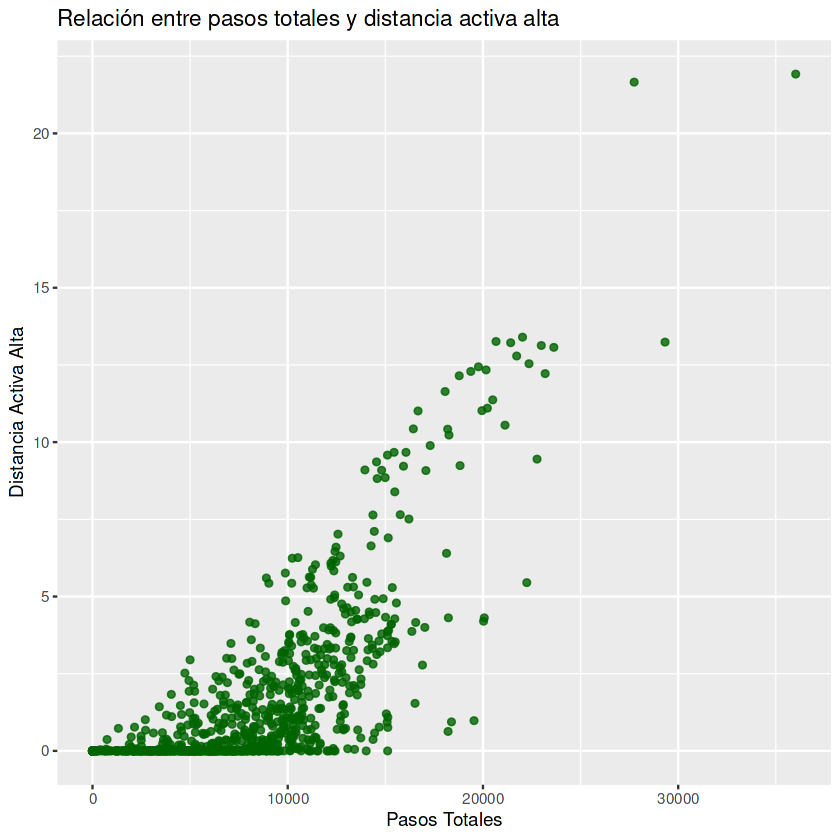

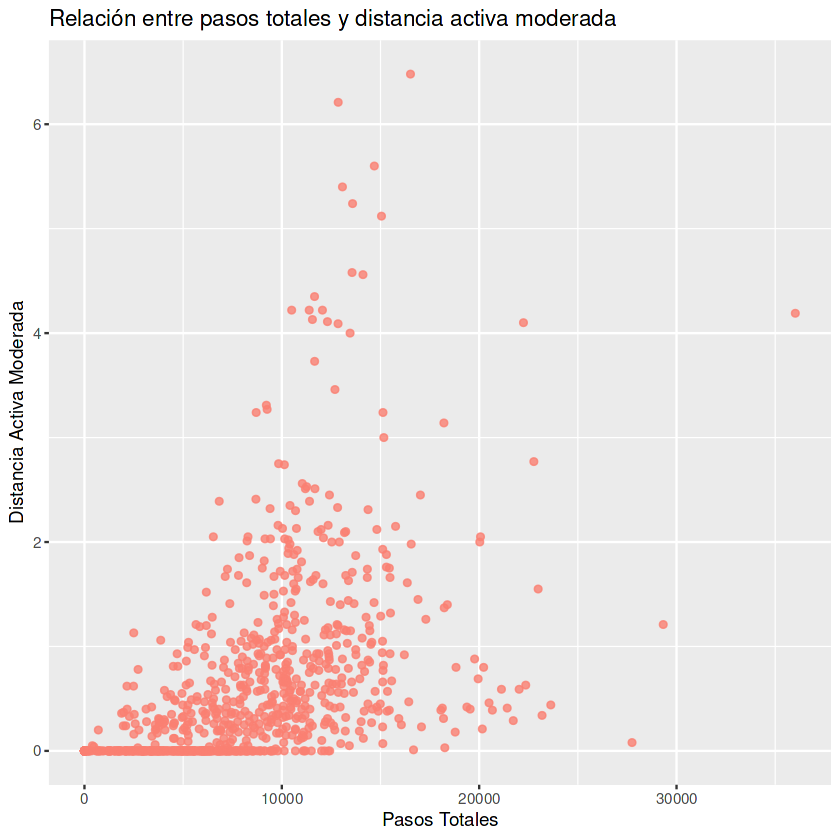

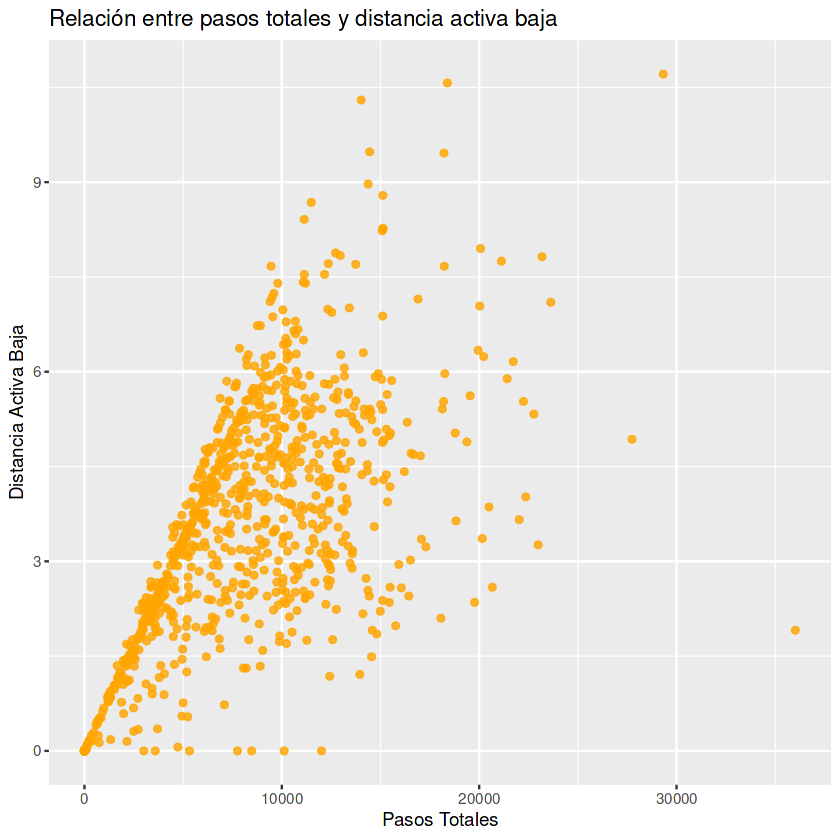

In [13]:
ggplot(data=daily_activity, aes(x=total_steps, y =very_active_distance)) + geom_point(alpha = 0.8, color="dark green") + 
  labs(title= "Relación entre pasos totales y distancia activa alta",
       x= "Pasos Totales", y = "Distancia Activa Alta")

ggplot(data=daily_activity, aes(x=total_steps, y =moderately_active_distance)) + geom_point(alpha = 0.8, color = "salmon") + 
  labs(title= "Relación entre pasos totales y distancia activa moderada",
       x= "Pasos Totales", y= "Distancia Activa Moderada")

ggplot(data=daily_activity, aes(x=total_steps, y =light_active_distance)) + geom_point(alpha = 0.8, color= "orange") + 
  labs(title = "Relación entre pasos totales y distancia activa baja",
       x= "Pasos Totales", y="Distancia Activa Baja")

De esta comparación podríamos concluir que los consumidores de estos productos parecen ser personas comunes y corrientes que se ejercitan de una forma más informal, teniendo en cuenta que las distancias se realizan con paso suave.

* Con la siguiente observación vemos que la mayoría de los usuarios no controlan su peso, por lo que el producto bellabeat les parece adecuado a sus necesidades, ya que cubre la actividad diaria, el sueño y el estrés

In [14]:
table(weight_log_info$id)
table(heartrate_seconds$id)


1503960366 1927972279 2873212765 4319703577 4558609924 5577150313 6962181067 
         2          1          2          2          5          1         30 
8877689391 
        24 


2022484408 2026352035 2347167796 4020332650 4388161847 4558609924 5553957443 
    154104       2490     152683     285461     249748     192168     255174 
5577150313 6117666160 6775888955 6962181067 7007744171 8792009665 8877689391 
    248560     158899      32771     266326     133592     122841     228841 

Esto nos muestra la cantidad de veces que cada id, es decir, cada usuario, tiene datos de peso y frecuencia cardíaca.


### Fusión de dos conjuntos de datos: sleep_day y daily_activity

In [17]:
combined_data <- merge(sleep_day, daily_activity, by="id")

Veamos cuántos participantes hay en el conjunto de datos

In [18]:
n_distinct(combined_data$id)

[1] 24

Voy a usar un outer join para unir todos los id de ambas tablas.

In [19]:
combined_data <- merge(sleep_day, daily_activity, by="id", all= TRUE)

Veamos cuantos id hay ahora

In [20]:
n_distinct(combined_data$id)

[1] 33

Ahora que hemos unido ambas tablas vamos a ver relaciones entre variables

* ¿Cuál es la relación entre el total de pasos y el total de minutos dormidos?

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 227 rows containing non-finite values (`stat_smooth()`).”


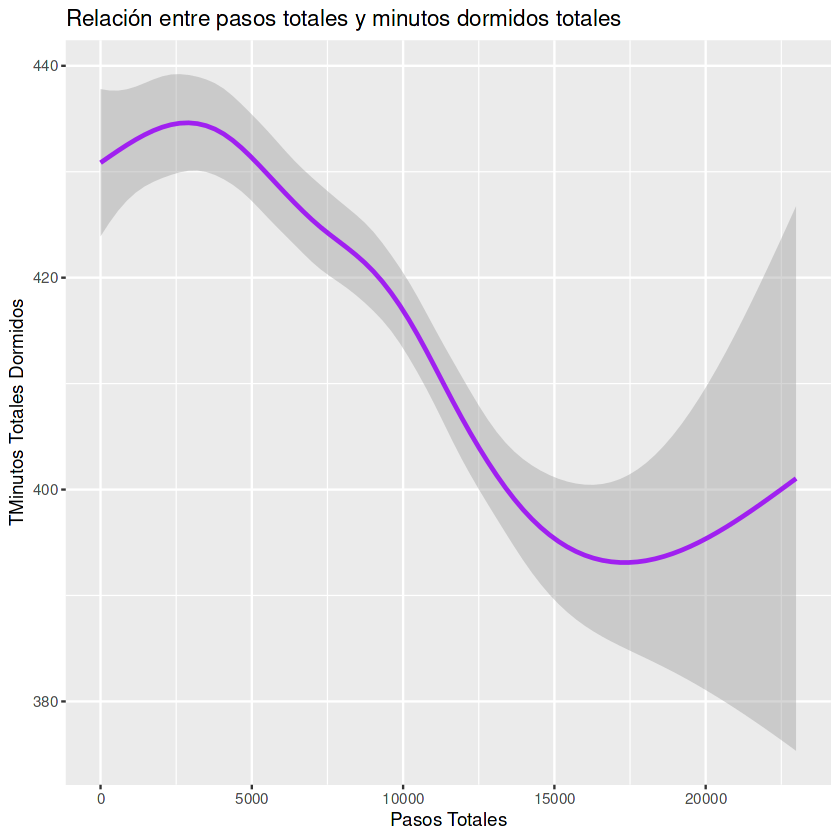

In [21]:
ggplot(combined_data, aes(x=total_steps, y=total_minutes_asleep)) + geom_smooth(color="purple") + 
  labs(title= "Relación entre pasos totales y minutos dormidos totales",
       x="Pasos Totales",y ="TMinutos Totales Dormidos")

Parece que las personas que duermen menos tiempo dan más pasos a lo largo del día

* ¿Cuál es la relación entre el total de pasos y el tiempo total en la cama?

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 227 rows containing non-finite values (`stat_smooth()`).”


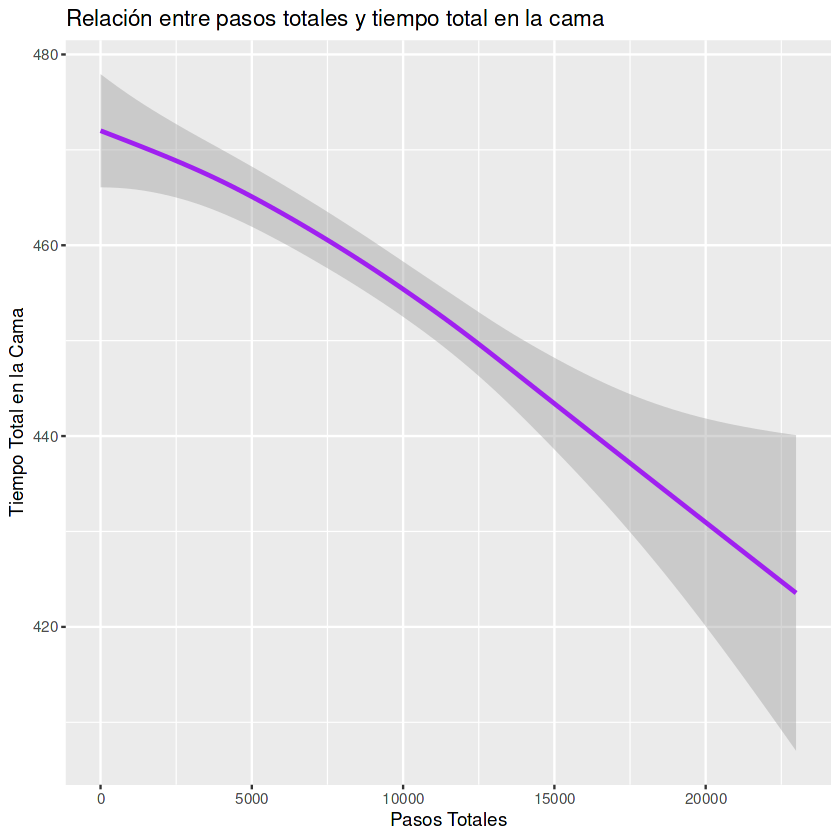

In [22]:
ggplot(combined_data, aes(x= total_steps, y = total_time_in_bed)) + geom_smooth(color="purple") + 
  labs(title="Relación entre pasos totales y tiempo total en la cama",
       x = "Pasos Totales", y="Tiempo Total en la Cama")

Dando sentido al gráfico anterior, los usuarios que pasan menos tiempo en la cama dan más pasos

* Relación entre minutos sedentarios y minutos totales dormidos

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 227 rows containing non-finite values (`stat_smooth()`).”


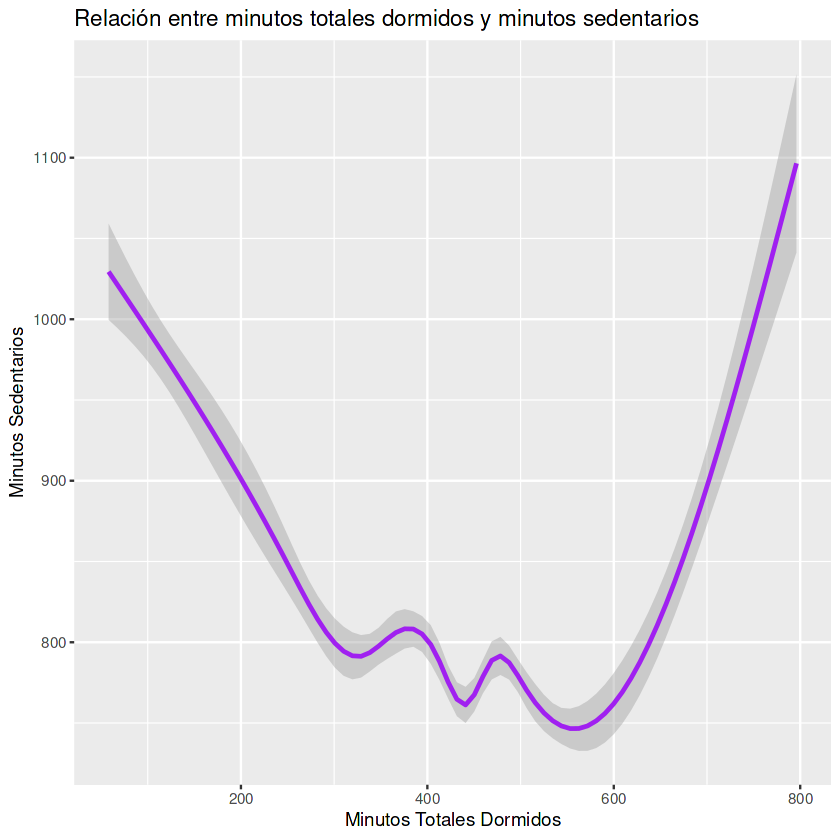

In [23]:
ggplot(combined_data, aes(x=total_minutes_asleep, y = sedentary_minutes)) + geom_smooth(color="purple") + 
  labs(title="Relación entre minutos totales dormidos y minutos sedentarios",
       x ="Minutos Totales Dormidos", y="Minutos Sedentarios")

Aquí vemos que hay un rango en el que durmiendo entre 300 y 600 minutos, hay menos minutos sedentarios, y de ahí, cuantos más minutos dormidos, más minutos sedentarios.


### Perspectivas

## Público objetivo
En base a lo que nos dicen los datos, se puede observar que los usuarios de este tipo de aplicaciones son personas con un ritmo de vida normal. Utilizan estos dispositivos principalmente para controlar sus pasos y horas de sueño, sin embargo, no hacen mucho uso de la información de su peso.

Creo que bellabeat está pensado para un público de este estilo. Cualquiera puede usarlo y puede ser útil en su día a día.

## Camino a seguir

Respecto a la **mejora de la app**, algunas ideas son:

* Partiendo de que el mayor uso es de los pasos y las horas de sueño, la aplicación podría enviar mensajes si ve que llevas mucho tiempo sin caminar o incluso que tenga función de despertador para no gastar tanto tiempo durmiendo. Todo ello sería personalizable por el usuario en función de sus preferencias.
 
* Los usuarios no controlan demasiado su peso. Una innovación para diferenciarse de la competencia podría ser agregar a la aplicación una opción para realizar un seguimiento de las comidas e incluso hacer sugerencias para una dieta más equilibrada.


En cuanto a la **estrategia de marketing**:

* Resaltar que la app Bellabeat es una app de uso diario que te ayuda a tener más control sobre tu vida y a conocerte mejor.
 
* Dado que el público objetivo de esta empresa son las mujeres, me parece interesante realizar una campaña que destaque que esta app te ayuda a llevar un control de tu ciclo menstrual, ya que es algo que la diferencia de su competencia.


Y este es el final de este estudio de caso, gracias por su tiempo.
